In [1]:
# Core libs
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving water_potability.csv to water_potability.csv


'water_potability.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
print('Shape:', df.shape)
print()
df.info()
print()
df.isna().sum().sort_values(ascending=False)

Shape: (3276, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB



,0
Sulfate,781
ph,491
Trihalomethanes,162
Hardness,0
Chloramines,0
Solids,0
Conductivity,0
Organic_carbon,0
Turbidity,0
Potability,0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [20]:
# Class balance
df['Potability'].value_counts(normalize=True).rename({0:'Not Potable',1:'Potable'})

,proportion
Potability,
Not Potable,0.60989
Potable,0.39011


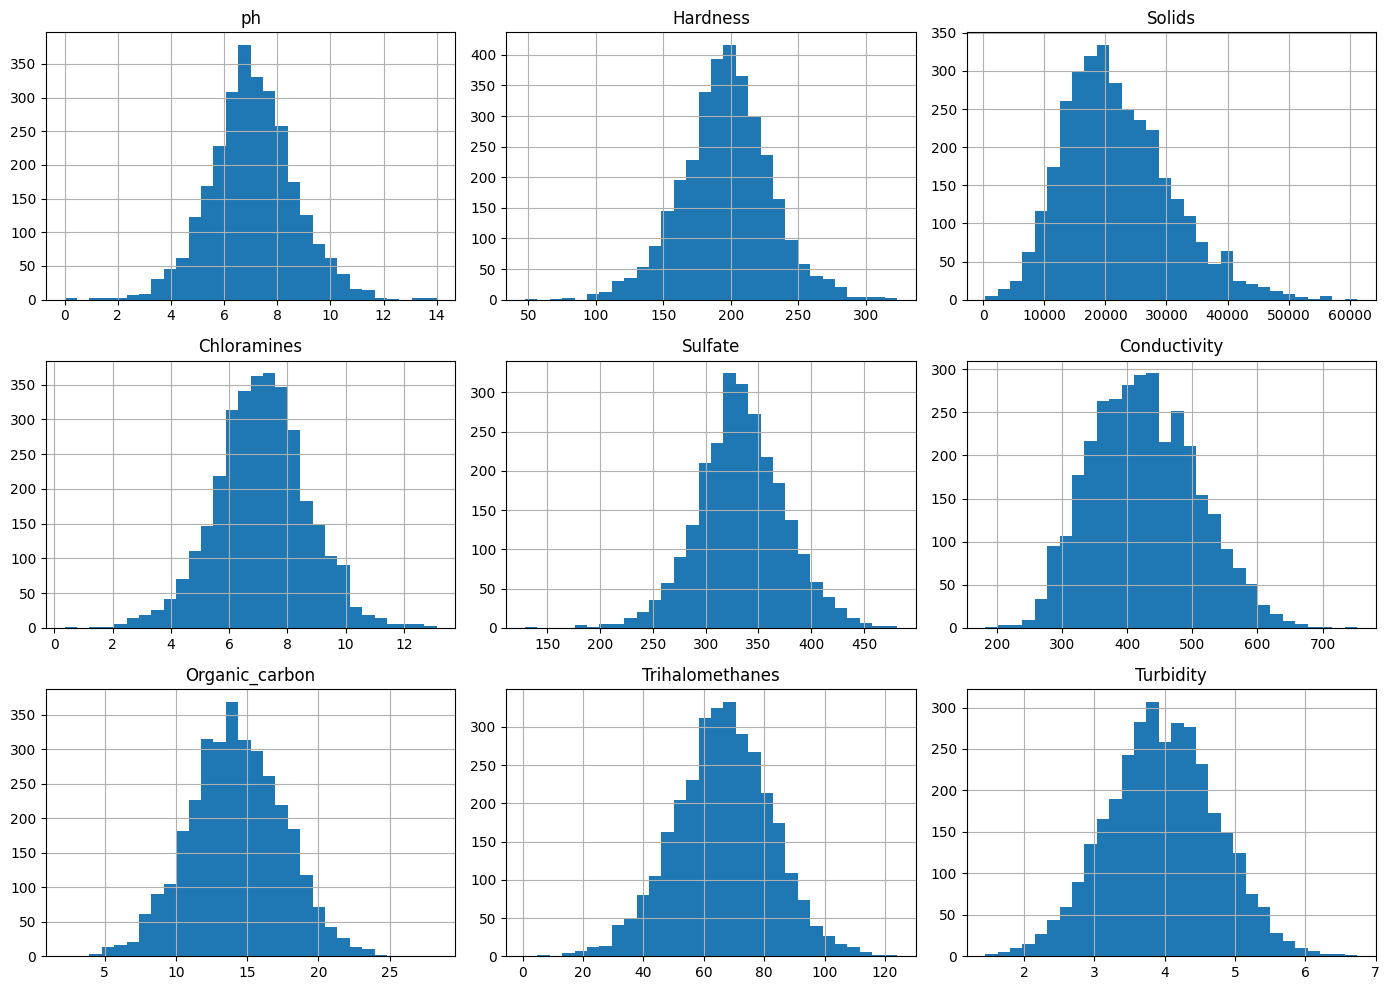

In [21]:
num_cols = [c for c in df.columns if c != 'Potability']
df[num_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()

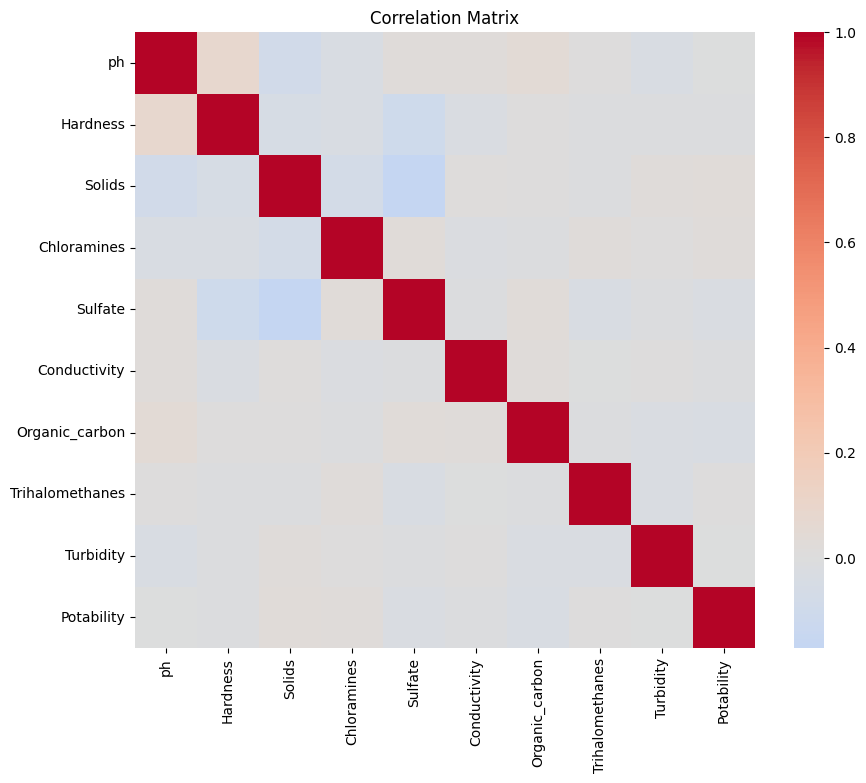

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [24]:
X = df.drop(columns=['Potability'])
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((2620, 9),
 (656, 9),
 np.float64(0.3900763358778626),
 np.float64(0.3902439024390244))

In [25]:
# Logistic regression pipeline
logreg_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500, class_weight='balanced', random_state=42))
])

# Random forest pipeline (no scaling needed, but keep imputer for safety)
rf_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

In [26]:
#train
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=42))])

== Logistic Regression ==
Accuracy: 0.524
Precision: 0.415
Recall: 0.531
F1-score: 0.466
ROC AUC: 0.547

classifcation report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57       400
           1       0.41      0.53      0.47       256

    accuracy                           0.52       656
   macro avg       0.52      0.53      0.52       656
weighted avg       0.55      0.52      0.53       656



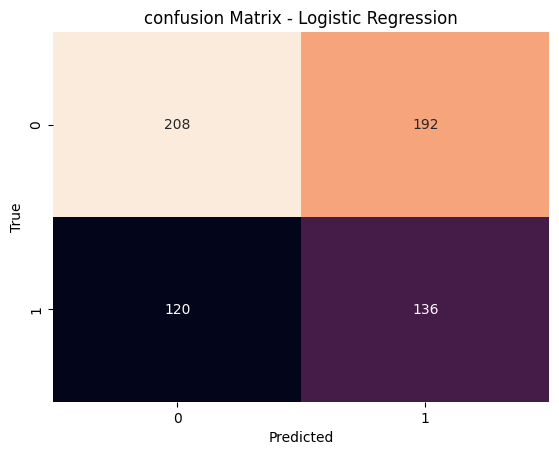

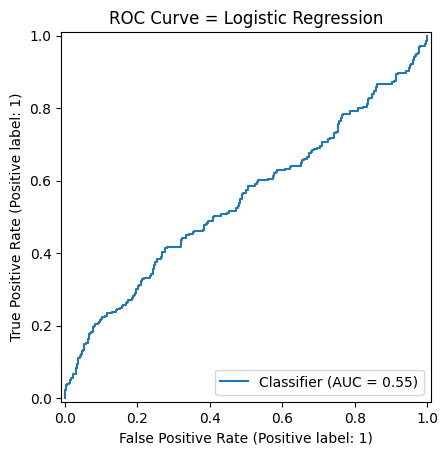

== Random Forest ==
Accuracy: 0.672
Precision: 0.695
Recall: 0.285
F1-score: 0.404
ROC AUC: 0.659

classifcation report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77       400
           1       0.70      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.59       656
weighted avg       0.68      0.67      0.63       656



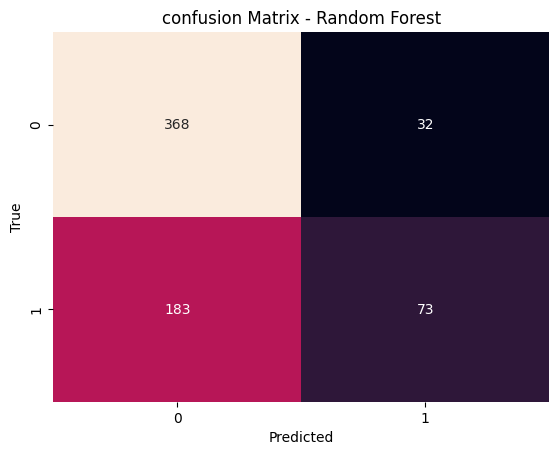

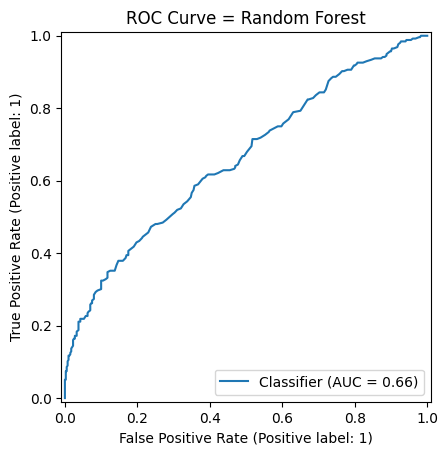

In [29]:
# Evaluate helper
def evaluate(model, name):
  y_pred = model.predict(X_test)
  # some models need predict_proba for ROC AUC
  try:
    y_prob = model.predict_proba(X_test)[:,1]
  except Exception:
    y_prob = None

  acc = accuracy_score(y_test, y_pred)
  prec, rec, f1, _=precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
  auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

  print(f'== {name} ==')
  print(f'Accuracy: {acc:.3f}')
  print(f'Precision: {prec:.3f}')
  print(f'Recall: {rec:.3f}')
  print(f'F1-score: {f1:.3f}')
  if not np.isnan(auc):
      print(f'ROC AUC: {auc:.3f}')
  print('\nclassifcation report:\n', classification_report(y_test, y_pred, zero_division=0))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cbar=False)
  plt.title(f'confusion Matrix - {name}')
  plt.xlabel('Predicted'); plt.ylabel('True')
  plt.show()

  if y_prob is not None:
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f'ROC Curve = {name}')
    plt.show()

evaluate(logreg_pipe, 'Logistic Regression')
evaluate(rf_pipe, 'Random Forest')


In [33]:
# Grab trained RF from pipeline
rf = rf_pipe.named_steps['model']
imputer = rf_pipe.named_steps['imputer']
# Columns are unchanged by SimpleImputer; order matches X columns
importances = rf.feature_importances_

fi = (pd.DataFrame({'feature': X.columns, 'importance': importances})
.sort_values('importance', ascending=False))

fi

,feature,importance
0,ph,0.130358
4,Sulfate,0.124851
1,Hardness,0.118687
3,Chloramines,0.117118
2,Solids,0.113191
5,Conductivity,0.101265
8,Turbidity,0.099427
6,Organic_carbon,0.098721
7,Trihalomethanes,0.096382


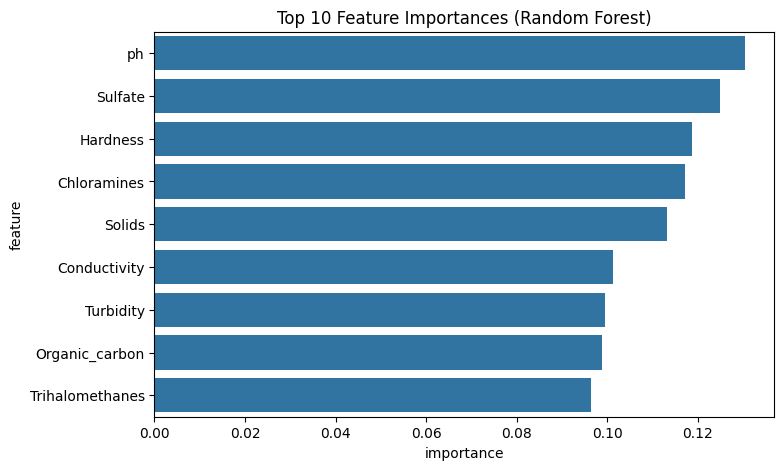

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(data=fi.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [37]:
from IPython.display import Markdown

Markdown("""
# 📌 Conclusion

- Logistic Regression baseline gave **52% accuracy**, with balanced but weak performance across classes.
- Random Forest improved to **67% accuracy**, with high precision (70%) but low recall (29%) for drinkable water.
- Key features influencing water potability include **pH, Sulfate, and Solids**.

### Insights:
- The models show that predicting safe drinking water is challenging due to **class imbalance**.
- Random Forest is better for avoiding **false positives** (wrongly calling unsafe water drinkable).
- Future improvements could include **oversampling, hyperparameter tuning, or advanced models (XGBoost/LightGBM)**.

This project demonstrates the full machine learning pipeline:
data cleaning → EDA → model building → evaluation → insights.
""")



# 📌 Conclusion

- Logistic Regression baseline gave **52% accuracy**, with balanced but weak performance across classes.  
- Random Forest improved to **67% accuracy**, with high precision (70%) but low recall (29%) for drinkable water.  
- Key features influencing water potability include **pH, Sulfate, and Solids**.  

### Insights:
- The models show that predicting safe drinking water is challenging due to **class imbalance**.  
- Random Forest is better for avoiding **false positives** (wrongly calling unsafe water drinkable).  
- Future improvements could include **oversampling, hyperparameter tuning, or advanced models (XGBoost/LightGBM)**.  

This project demonstrates the full machine learning pipeline:  
data cleaning → EDA → model building → evaluation → insights.
